<a href="https://colab.research.google.com/github/LazyHooks/ACN_clustering/blob/main/cluster_ben_atci_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [28]:
import warnings

warnings.filterwarnings('ignore')

input

In [29]:
df = pd.read_csv("eps_ben_atci.csv")

exploratory

In [30]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2505 entries, 0 to 2504
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Level       2505 non-null   int64
 1   gender      2505 non-null   int64
 2   Tenure      2505 non-null   int64
 3   KT          2505 non-null   int64
 4   Ext Parity  2505 non-null   int64
 5   med1        2505 non-null   int64
 6   med2        2505 non-null   int64
 7   med3        2505 non-null   int64
 8   lv1         2505 non-null   int64
 9   lv2         2505 non-null   int64
 10  lv3         2505 non-null   int64
 11  ben1        2505 non-null   int64
 12  ben2        2505 non-null   int64
 13  ben3        2505 non-null   int64
dtypes: int64(14)
memory usage: 274.1 KB


In [31]:
df.head()

,Level,gender,Tenure,KT,Ext Parity,med1,med2,med3,lv1,lv2,lv3,ben1,ben2,ben3
0,0,1,2,1,1,12,14,13,2,3,4,1,3,2
1,0,0,1,0,1,13,14,16,2,1,3,6,3,4
2,0,0,2,1,0,13,16,15,3,2,6,3,4,1
3,1,0,2,0,1,14,12,13,2,7,4,3,4,6
4,0,0,2,0,1,12,13,14,1,3,2,1,2,3


checks

In [32]:
df.isnull().sum()
df.describe()

,Level,gender,Tenure,KT,Ext Parity,med1,med2,med3,lv1,lv2,lv3,ben1,ben2,ben3
count,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000,2505.000000
mean,0.675848,0.599601,2.597605,0.595609,0.477844,13.504591,13.727345,13.847904,4.181238,3.538124,3.712575,2.773253,3.001996,3.291417
std,0.525237,0.490077,1.008428,0.490872,0.499609,1.411698,1.260226,1.394743,2.507952,2.059480,1.949139,1.530991,1.517074,1.533605
min,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000,12.000000,12.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,2.000000,0.000000,0.000000,12.000000,13.000000,13.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,1.000000,1.000000,2.000000,1.000000,0.000000,13.000000,14.000000,14.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,1.000000,1.000000,4.000000,1.000000,1.000000,15.000000,15.000000,15.000000,7.000000,5.000000,5.000000,4.000000,4.000000,4.000000
max,2.000000,1.000000,4.000000,1.000000,1.000000,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,6.000000,6.000000,6.000000


In [33]:
X=df

Scaling

In [34]:
cols = X.columns

In [35]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [36]:
X = pd.DataFrame(X, columns=[cols])

In [37]:
X.head()

,Level,gender,Tenure,KT,Ext Parity,med1,med2,med3,lv1,lv2,lv3,ben1,ben2,ben3
0,0.0,1.0,0.333333,1.0,1.0,0.00,0.50,0.25,0.142857,0.285714,0.500,0.0,0.4,0.2
1,0.0,0.0,0.000000,0.0,1.0,0.25,0.50,1.00,0.142857,0.000000,0.375,1.0,0.4,0.6
2,0.0,0.0,0.333333,1.0,0.0,0.25,1.00,0.75,0.285714,0.142857,0.750,0.4,0.6,0.0
3,0.5,0.0,0.333333,0.0,1.0,0.50,0.00,0.25,0.142857,0.857143,0.500,0.4,0.6,1.0
4,0.0,0.0,0.333333,0.0,1.0,0.00,0.25,0.50,0.000000,0.285714,0.250,0.0,0.2,0.4


In [38]:
X.dropna(inplace=True)
X

,Level,gender,Tenure,KT,Ext Parity,med1,med2,med3,lv1,lv2,lv3,ben1,ben2,ben3
0,0.0,1.0,0.333333,1.0,1.0,0.00,0.50,0.25,0.142857,0.285714,0.500,0.0,0.4,0.2
1,0.0,0.0,0.000000,0.0,1.0,0.25,0.50,1.00,0.142857,0.000000,0.375,1.0,0.4,0.6
2,0.0,0.0,0.333333,1.0,0.0,0.25,1.00,0.75,0.285714,0.142857,0.750,0.4,0.6,0.0
3,0.5,0.0,0.333333,0.0,1.0,0.50,0.00,0.25,0.142857,0.857143,0.500,0.4,0.6,1.0
4,0.0,0.0,0.333333,0.0,1.0,0.00,0.25,0.50,0.000000,0.285714,0.250,0.0,0.2,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2500,0.0,1.0,0.000000,0.0,1.0,0.00,1.00,0.50,0.285714,0.714286,0.250,0.8,0.2,0.6
2501,0.5,1.0,0.333333,1.0,0.0,0.25,0.50,0.00,0.000000,0.285714,0.500,0.0,0.2,0.4
2502,0.0,1.0,0.000000,0.0,0.0,0.00,0.25,1.00,0.142857,0.714286,0.125,0.2,0.4,0.0
2503,0.5,1.0,1.000000,1.0,0.0,1.00,0.25,0.75,0.285714,0.428571,0.750,0.0,0.2,0.4


K means

In [39]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [40]:
kmeans.cluster_centers_

array([[2.92397661e-01, 5.35505430e-01, 4.58089669e-01, 5.83124478e-01,
        1.00000000e+00, 4.01002506e-01, 4.39223058e-01, 4.64494570e-01,
        4.60436806e-01, 3.70807972e-01, 4.71386800e-01, 3.57727652e-01,
        4.10359231e-01, 4.60818713e-01],
       [3.79587156e-01, 6.58256881e-01, 6.00662589e-01, 6.07033639e-01,
        1.16573418e-15, 3.53402141e-01, 4.25076453e-01, 4.59671254e-01,
        4.48995194e-01, 3.55067715e-01, 4.57377676e-01, 3.51834862e-01,
        3.91284404e-01, 4.55963303e-01]])

inertia

In [41]:
kmeans.inertia_

3883.516537171701

Elbow

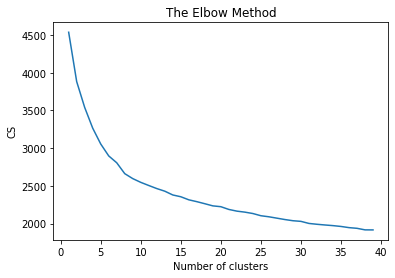

In [42]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

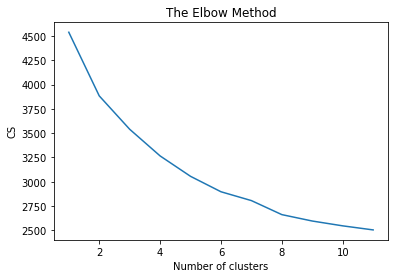

In [43]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [44]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=0) 

kmeans.fit(X)

KMeans(random_state=0)

In [45]:
labels=kmeans.labels_
print(labels)

[1 0 6 ... 5 3 1]


In [46]:
Z=kmeans.cluster_centers_
Z

array([[ 1.98347107e-01,  0.00000000e+00,  3.18181818e-01,
         0.00000000e+00,  1.00000000e+00,  4.28719008e-01,
         4.57644628e-01,  4.84504132e-01,  4.37426210e-01,
         3.64226682e-01,  4.78822314e-01,  3.84297521e-01,
         4.28925620e-01,  4.62809917e-01],
       [ 3.45052083e-01,  1.00000000e+00,  5.47743056e-01,
         1.00000000e+00,  1.00000000e+00,  3.54166667e-01,
         4.30989583e-01,  4.85677083e-01,  4.51636905e-01,
         3.53422619e-01,  4.53450521e-01,  3.08333333e-01,
         4.18750000e-01,  4.69270833e-01],
       [ 3.05447471e-01,  1.00000000e+00,  3.81322957e-01,
        -3.33066907e-16,  1.00000000e+00,  4.12451362e-01,
         4.18287938e-01,  4.40661479e-01,  4.59143969e-01,
         3.69649805e-01,  4.82003891e-01,  3.43968872e-01,
         3.90661479e-01,  4.44357977e-01],
       [ 3.93822394e-01,  1.00000000e+00,  6.27413127e-01,
         1.00000000e+00,  1.83186799e-15,  3.23359073e-01,
         4.16505792e-01,  4.77799228e-01,  4.

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 2505 samples in 0.006s...
[t-SNE] Computed neighbors for 2505 samples in 0.366s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2505
[t-SNE] Computed conditional probabilities for sample 2000 / 2505
[t-SNE] Computed conditional probabilities for sample 2505 / 2505
[t-SNE] Mean sigma: 0.543806
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.091919
[t-SNE] KL divergence after 1150 iterations: 0.874559


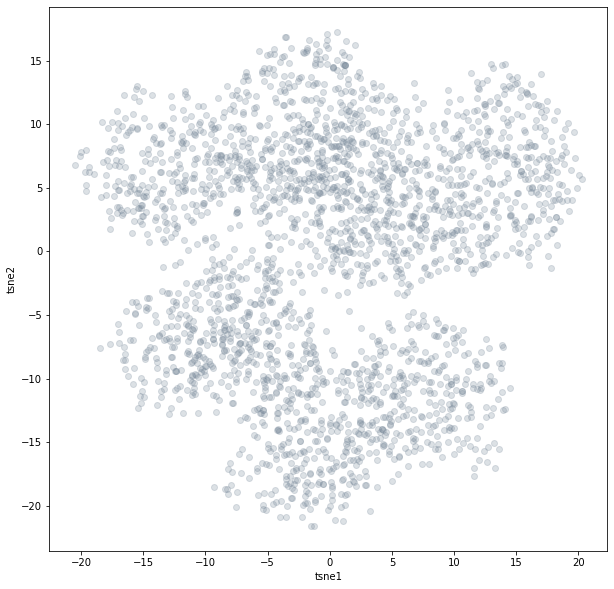

In [47]:

tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [48]:
import matplotlib

In [49]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 2505 samples in 0.006s...
[t-SNE] Computed neighbors for 2505 samples in 0.371s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2505
[t-SNE] Computed conditional probabilities for sample 2000 / 2505
[t-SNE] Computed conditional probabilities for sample 2505 / 2505
[t-SNE] Mean sigma: 0.543806
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.132446
[t-SNE] KL divergence after 2500 iterations: 1.005519


In [50]:
np.unique(labels)


array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

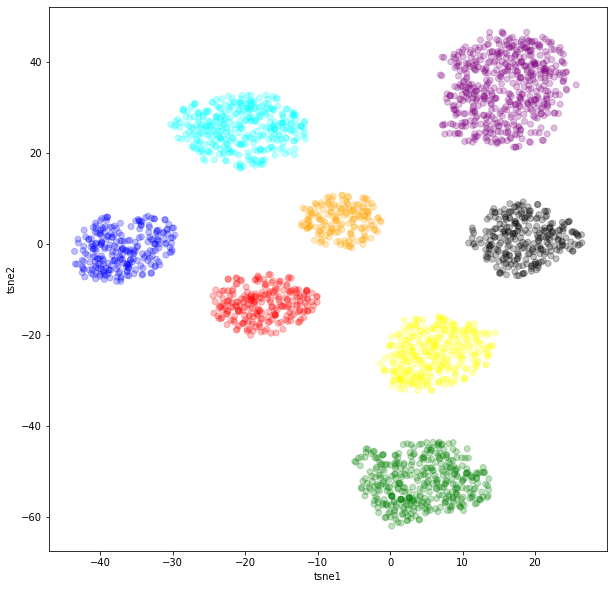

In [54]:
colors = ["red","green","blue","purple","yellow","cyan","black","orange"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [52]:
Z2 = ms.inverse_transform(Z)
Z2

array([[ 3.96694215e-01,  0.00000000e+00,  1.95454545e+00,
         0.00000000e+00,  1.00000000e+00,  1.37148760e+01,
         1.38305785e+01,  1.39380165e+01,  4.06198347e+00,
         3.54958678e+00,  3.83057851e+00,  2.92148760e+00,
         3.14462810e+00,  3.31404959e+00],
       [ 6.90104167e-01,  1.00000000e+00,  2.64322917e+00,
         1.00000000e+00,  1.00000000e+00,  1.34166667e+01,
         1.37239583e+01,  1.39427083e+01,  4.16145833e+00,
         3.47395833e+00,  3.62760417e+00,  2.54166667e+00,
         3.09375000e+00,  3.34635417e+00],
       [ 6.10894942e-01,  1.00000000e+00,  2.14396887e+00,
        -3.33066907e-16,  1.00000000e+00,  1.36498054e+01,
         1.36731518e+01,  1.37626459e+01,  4.21400778e+00,
         3.58754864e+00,  3.85603113e+00,  2.71984436e+00,
         2.95330739e+00,  3.22178988e+00],
       [ 7.87644788e-01,  1.00000000e+00,  2.88223938e+00,
         1.00000000e+00,  1.83186799e-15,  1.32934363e+01,
         1.36660232e+01,  1.39111969e+01,  4.